In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200623_Keck1_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200623_Keck1

## Ca II IRT

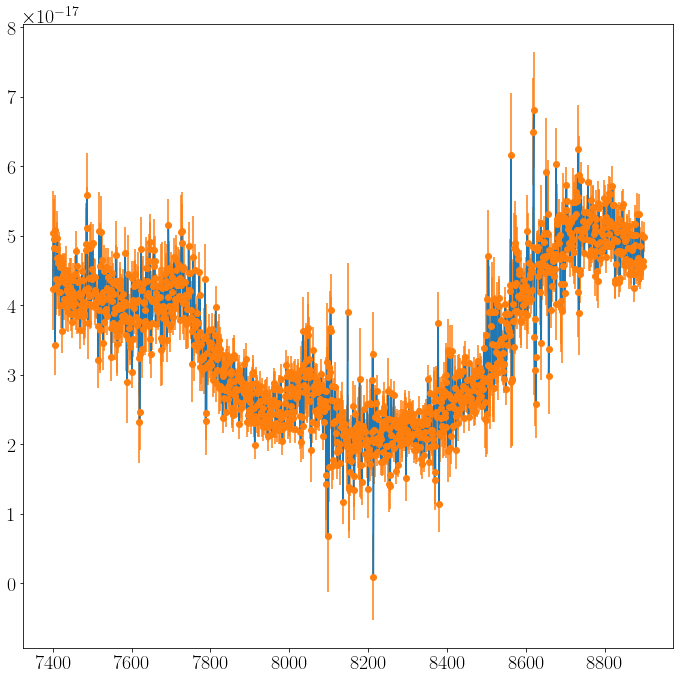

In [3]:
Spec1.plot_line_region(7400, 8900)

In [4]:
Spec1.add_line('CaII_IRT', 7600, 8750, lines=[8498.018, 8542.089, 8662.140])

987 points within 7600.00 and 8750.00 angstroms.


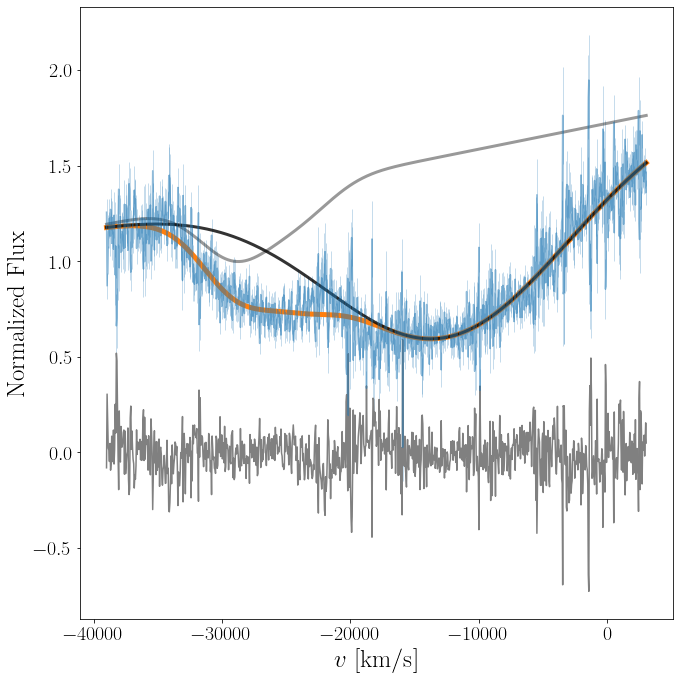

LS estimation:
Velocity pvf: -9131 km/s
Velocity hvf: -23985 km/s


In [5]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 0/50000 [00:00<?, ?it/s]

MCMC results:
Velocity pvf: -9785 pm 123 km/s
Velocity hvf: -24195 pm 145 km/s


  9%|▊         | 4350/50000 [06:33<1:08:50, 11.05it/s]


MCMC results:
Velocity pvf: -9815 pm 112 km/s
Velocity hvf: -24193 pm 155 km/s


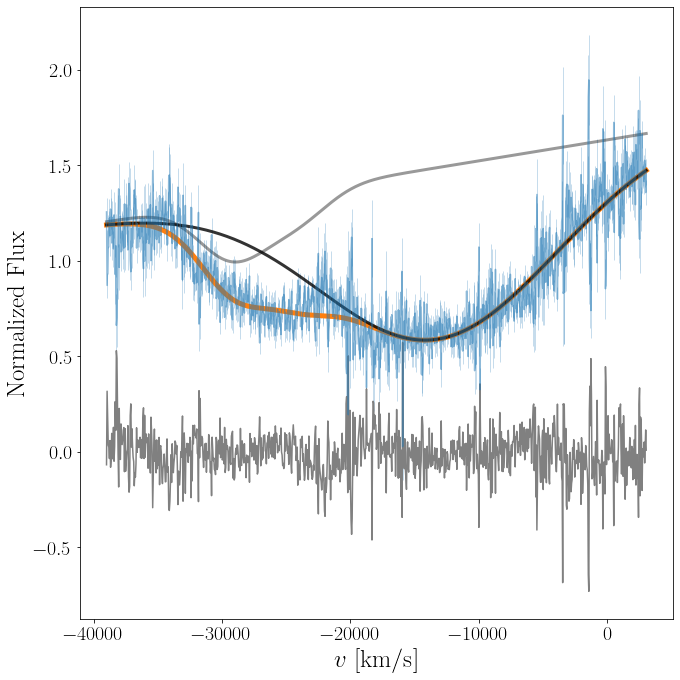

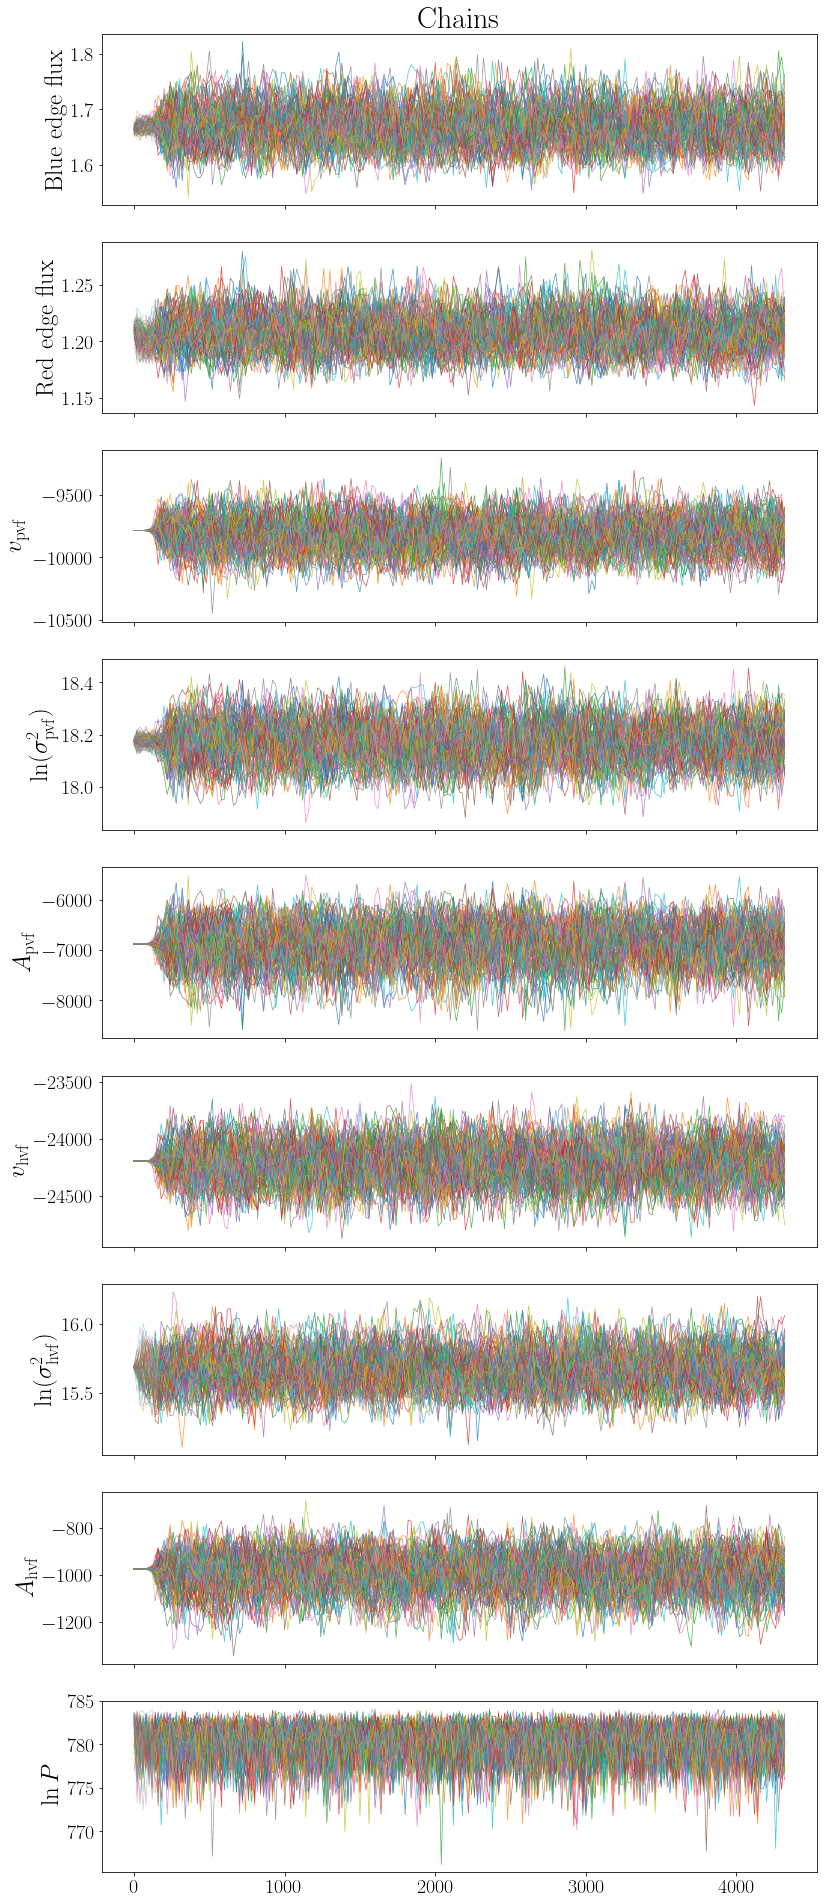

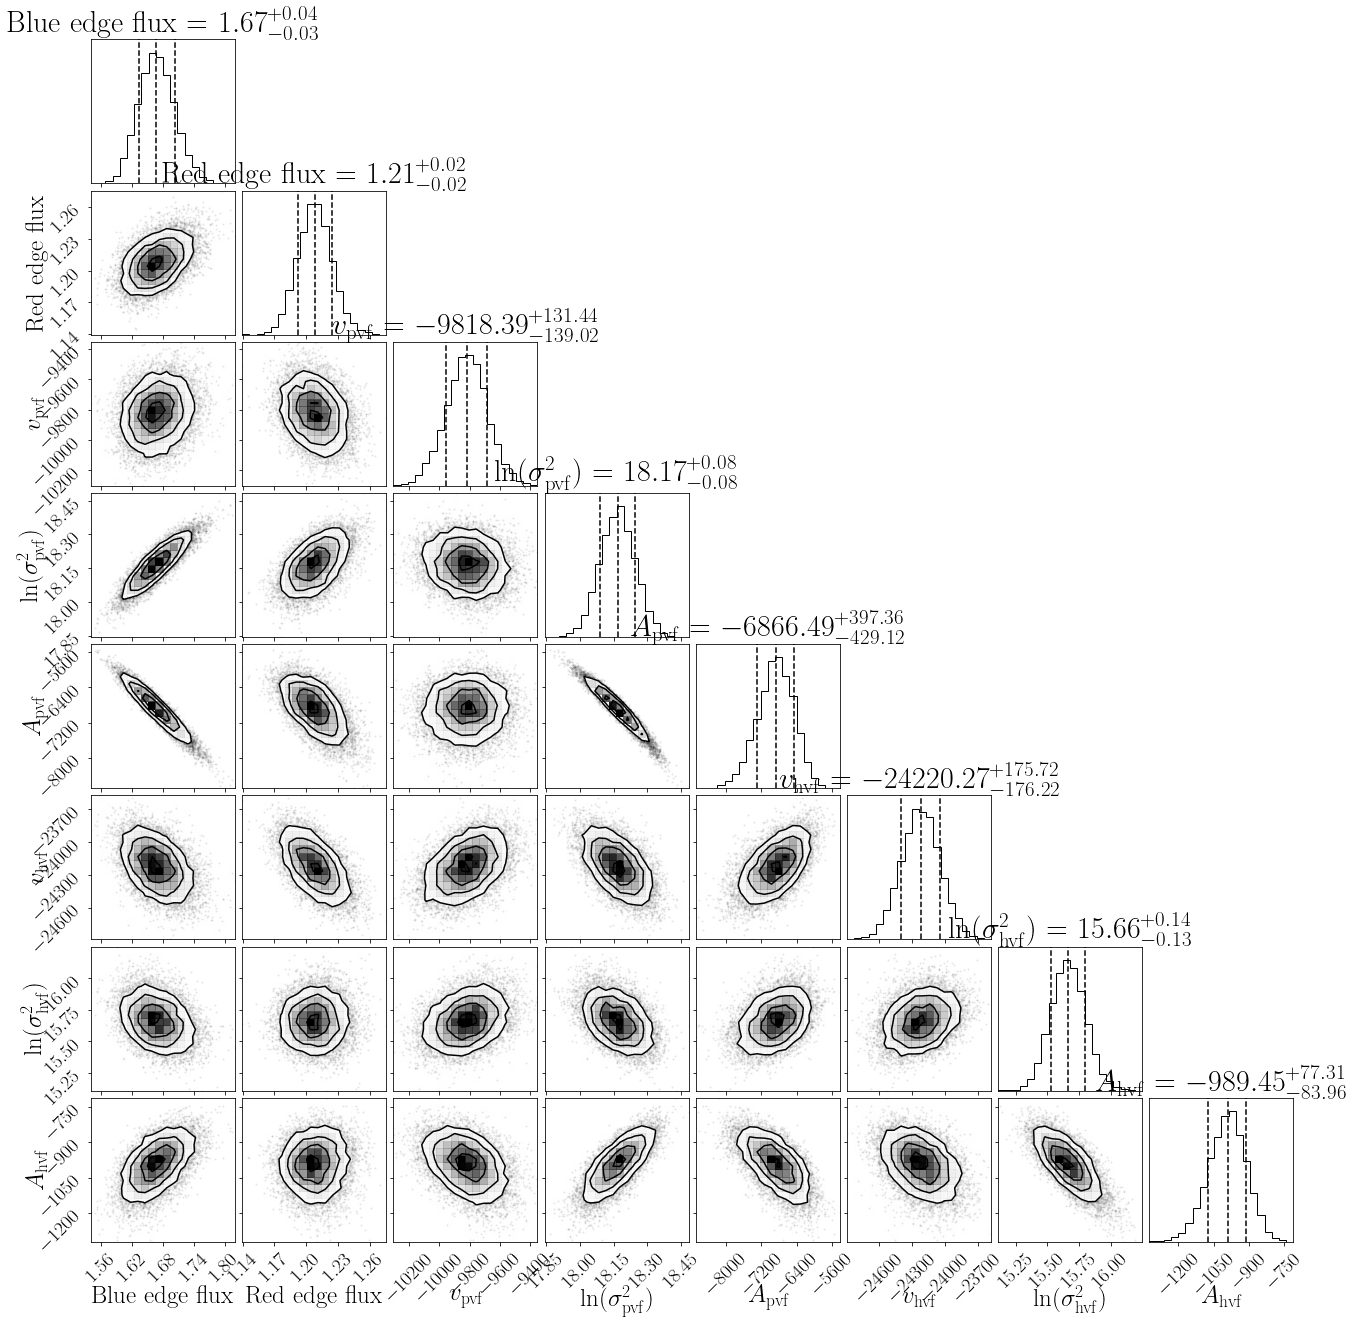

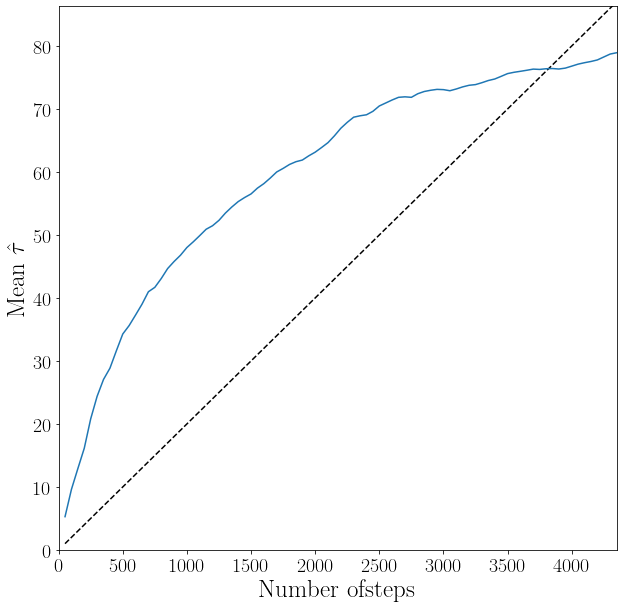

In [7]:
mu_pvf_prior = -10500
var_pvf_prior = 200**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)